In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Bipolar Inputs: (-1, -1), (-1, 1), (1, -1), (1, 1)
X = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])
# Corresponding bipolar AND Targets: -1 for false, 1 for true
T = np.array([[-1], [-1], [-1], [1]])

In [ ]:
# Append a bias term (1) to each input vector
X_bias = np.hstack((X, np.ones((X.shape[0], 1))))

In [5]:
# Initialize weights with random values
np.random.seed(1)
W = np.random.randn(3, 1)

In [6]:
learning_rate = 0.1
epochs = 50
errors = []

In [7]:
for epoch in range(epochs):
    total_error = 0
    for i in range(len(X_bias)):
        y_pred = np.dot(X_bias[i], W)
        error = T[i] - y_pred
        W += learning_rate * error * X_bias[i].reshape(-1, 1)
        total_error += (error**2).item()
    errors.append(total_error)

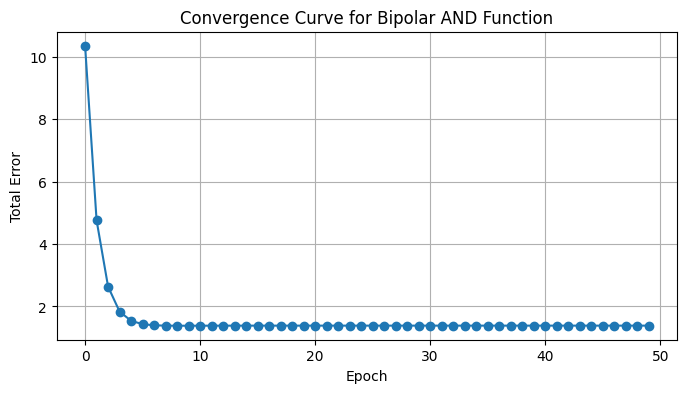

In [8]:
plt.figure(figsize=(8, 4))
plt.plot(errors, marker='o')
plt.title("Convergence Curve for Bipolar AND Function")
plt.xlabel("Epoch")
plt.ylabel("Total Error")
plt.grid(True)
plt.show()

In [9]:
print("Final weights after training:\n", W)

Final weights after training:
 [[ 0.52941176]
 [ 0.55882353]
 [-0.5       ]]


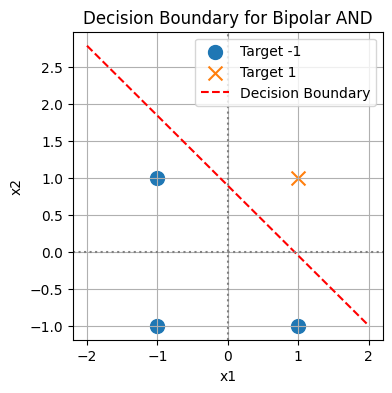

In [13]:
plt.figure(figsize=(4, 4))
for label, marker in zip([-1, 1], ['o', 'x']):
    plt.scatter(X[T.flatten() == label][:, 0],
                X[T.flatten() == label][:, 1],
                label=f'Target {label}',
                marker=marker, s=100)
x_vals = np.linspace(-2, 2, 100)
y_vals = -(W[0] * x_vals + W[2]) / W[1]
plt.plot(x_vals, y_vals.flatten(), 'r--', label='Decision Boundary')
plt.title("Decision Boundary for Bipolar AND")
plt.xlabel("x1"); plt.ylabel("x2")
plt.axhline(0, color='gray', linestyle=':')
plt.axvline(0, color='gray', linestyle=':')
plt.legend(); plt.grid(True); plt.show()